### **1. Mô tả bộ dataset**
Dataset từ Kaggle cung cấp dữ liệu gồm các bài báo với tiêu đề, nội dung, và nhãn.  
- **Cột dữ liệu chính**:
  - `title`: Tiêu đề bài báo.
  - `text`: Nội dung bài báo.
  - `label`: Nhãn, với:
    - 0: Tin giả.
    - 1: Tin thật.  
- **Đặc điểm**:
  - Bộ dữ liệu có số lượng lớn các bản ghi, giúp đào tạo và kiểm tra các mô hình học máy.

---

### **2. Mô tả bài toán**
**Bài toán**: Phân loại một bài báo là thật hay giả dựa trên tiêu đề và nội dung.  
- **Loại bài toán**: Classification (Supervised Learning).  
- **Mục tiêu**:  
  - Xây dựng mô hình dự đoán chính xác nhãn (`label`) của bài báo dựa trên tiêu đề và nội dung.
  - Đo lường hiệu suất mô hình qua độ chính xác, ma trận nhầm lẫn, và báo cáo phân loại.

---

### **3. Phương pháp thực hiện**
  - Sử dụng Logistic Regression.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LR/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LR/data/evaluation.csv
/content/gdrive/MyDrive/LR/data/test.csv
/content/gdrive/MyDrive/LR/data/train.csv


* train.csv: Dữ liệu huấn luyện
* test.csv: Dữ liệu kiểm tra
* evaluation.csv: Dữ liệu để đánh giá mô hình sau khi huấn luyện

In [ ]:
import pandas as pd

# Tải dữ liệu từ các tệp CSV
train = pd.read_csv("/content/gdrive/MyDrive/LR/data/train.csv", delimiter=';')
test = pd.read_csv("/content/gdrive/MyDrive/LR/data/test.csv", delimiter=';')
eval = pd.read_csv("/content/gdrive/MyDrive/LR/data/evaluation.csv", delimiter=';')

# Kiểm tra thông tin dữ liệu
print(train.head())
print(test.head())
print(eval.head())


   Unnamed: 0                                              title  \
0           0  Palestinians switch off Christmas lights in Be...   
1           1  China says Trump call with Taiwan president wo...   
2           2   FAIL! The Trump Organization’s Credit Score W...   
3           3  Zimbabwe military chief's China trip was norma...   
4           4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0  
   Unnamed: 0                                              title  \
0           0  Live from New York, it's a Trump-Clinton remat...   
1           1  Catalan separatists to lose majority in tight ...   
2           2  

Kết hợp cột title và text, loại bỏ stopwords và thực hiện stemming.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Tải stopwords nếu chưa tải
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Hàm tiền xử lý văn bản
def preprocess(text):
    text = text.lower()  # Chuyển thành chữ thường
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Loại bỏ ký tự không phải chữ
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]  # Stemming
    return ' '.join(words)

# Áp dụng tiền xử lý cho cả title và text trong train, test và eval
train['processed'] = train['title'] + ' ' + train['text']
test['processed'] = test['title'] + ' ' + test['text']
eval['processed'] = eval['title'] + ' ' + eval['text']

train['processed'] = train['processed'].apply(preprocess)
test['processed'] = test['processed'].apply(preprocess)
eval['processed'] = eval['processed'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dữ liệu đã được tiền xử lý, bây giờ bạn cần chia chúng thành các phần: X_train, X_test, X_eval (văn bản đã xử lý) và y_train, y_test, y_eval (nhãn).

In [ ]:
X_train = train['processed']
y_train = train['label']

X_test = test['processed']
y_test = test['label']

X_eval = eval['processed']
y_eval = eval['label']


Sử dụng TF-IDF Vectorizer để chuyển đổi văn bản thành các đặc trưng số.
* Vector hóa văn bản

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vector hóa văn bản với TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_eval_tfidf = vectorizer.transform(X_eval)


Sử dụng Logistic Regression để huấn luyện mô hình phân loại tin tức giả.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X_train_tfidf, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 97.22%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3753
           1       0.97      0.98      0.97      4364

    accuracy                           0.97      8117
   macro avg       0.97      0.97      0.97      8117
weighted avg       0.97      0.97      0.97      8117



Kết quả mô hình Logistic Regression có độ chính xác 97.22%, với Precision và Recall đều đạt 97-98% cho cả hai lớp (Fake và True). F1-score là 0.97 cho cả hai lớp, cho thấy mô hình cân bằng tốt giữa độ chính xác và độ nhạy. Mô hình hoạt động hiệu quả và chính xác, với khả năng phân loại tin giả và tin thật cao.

Sử dụng các chỉ số như accuracy, precision, recall, F1-score và ma trận nhầm lẫn để đánh giá hiệu quả mô hình.

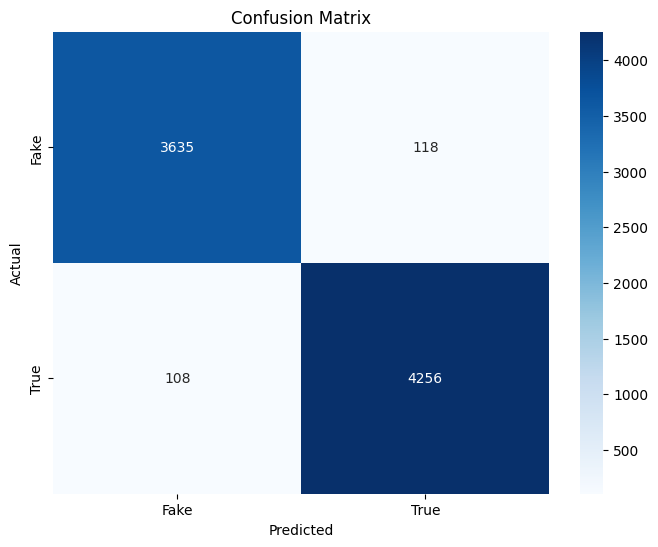

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hiển thị ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Sử dụng tập dữ liệu evaluation.csv để đánh giá thêm mô hình.

In [ ]:
# Dự đoán trên tập evaluation
y_eval_pred = model.predict(X_eval_tfidf)

# Đánh giá trên tập evaluation
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
print(f'Evaluation Accuracy: {eval_accuracy * 100:.2f}%')
print(classification_report(y_eval, y_eval_pred))


Evaluation Accuracy: 96.69%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3803
           1       0.97      0.97      0.97      4314

    accuracy                           0.97      8117
   macro avg       0.97      0.97      0.97      8117
weighted avg       0.97      0.97      0.97      8117



Kết quả đánh giá từ mô hình Logistic Regression:

- **Accuracy (Độ chính xác)**: 96.69%, mô hình có hiệu suất khá cao.
- **Precision và Recall**: Cả hai lớp (Fake và True) đều đạt khoảng 96-97%, cho thấy mô hình phân loại chính xác và cân bằng tốt.
- **F1-Score**: Cả hai lớp đều có F1-score 0.96-0.97, chứng tỏ sự kết hợp giữa Precision và Recall rất tốt.
- Mô hình hoạt động ổn định với các chỉ số đáng tin cậy cho cả hai lớp, phù hợp để phân loại tin giả và tin thật.